[1] 5248

[1] 2519

[1] 2729

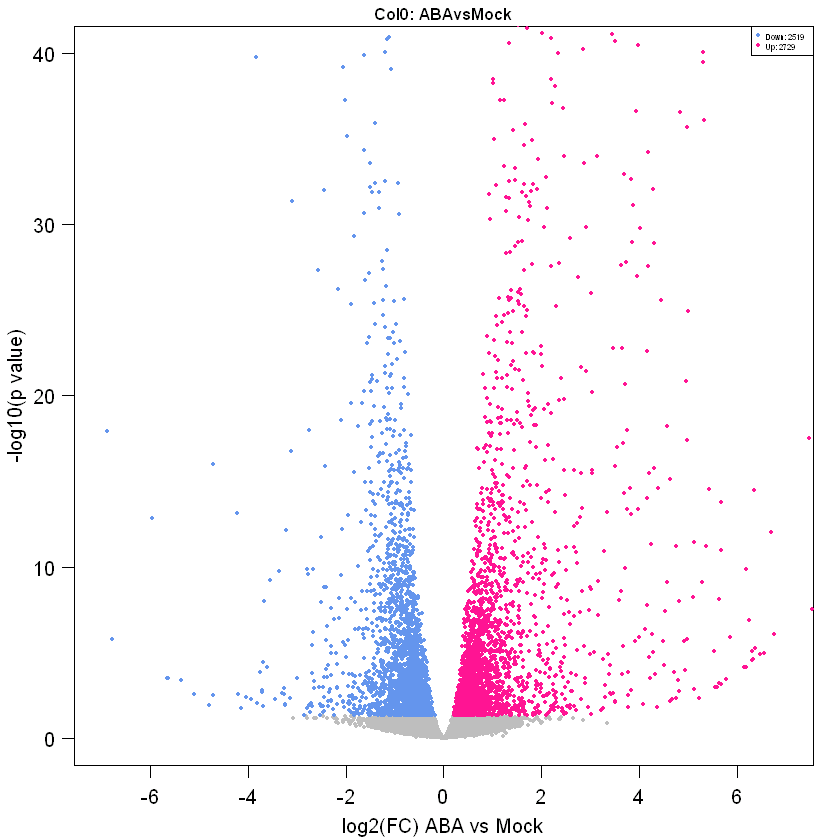

In [ ]:
#figure_1b

Col0_ABAvsMock = read.csv("data/RNA.rawcount.txt.ABA-Col0_vs_Mock-Col0.DESeq2.txt",header=T,sep="\t",row.names=1)

Col0_ABAvsMock_sig = subset(Col0_ABAvsMock,padj<0.05)
Col0_ABAvsMock_sig_down = subset(Col0_ABAvsMock_sig,log2FoldChange<0)
Col0_ABAvsMock_sig_up = subset(Col0_ABAvsMock_sig,log2FoldChange>0)

nrow(Col0_ABAvsMock_sig)
nrow(Col0_ABAvsMock_down)
nrow(Col0_ABAvsMock_sig_up)

### vacano plot for DEGs
#pdf("Col0_ABAvsMock_DEGs_volcano_plot.pdf", width=5.5/2.54, height=5.5/2.54)#,family = "Arial",pointsize = 8)#,paper = "a4")
par(mar= c(3,3,1,1)+0.1,mgp = c(2,0.8,0),las=1,lwd=1)
plot((Col0_ABAvsMock$log2FoldChange),-log10(Col0_ABAvsMock$padj), ylab = "-log10(p value)", xlab = "log2(FC) ABA vs Mock", col = "gray",pch = 16,cex =0.4,ylim = c(0,40),xlim = c(-7,7),main = "Col0: ABAvsMock",cex.main = 0.8)
points((Col0_ABAvsMock_sig$log2FoldChange),-log10(Col0_ABAvsMock_sig$padj),col = ifelse(Col0_ABAvsMock_sig$log2FoldChange<0,"cornflowerblue","deeppink1"),pch = 16,cex =0.4)
legend("topright", legend = c("Down: 2519","Up: 2729"),pch = 16,col = c("cornflowerblue","deeppink1"),cex =0.4,bg = "white")
#dev.off()


[1] 1639

[1] 829

[1] 810

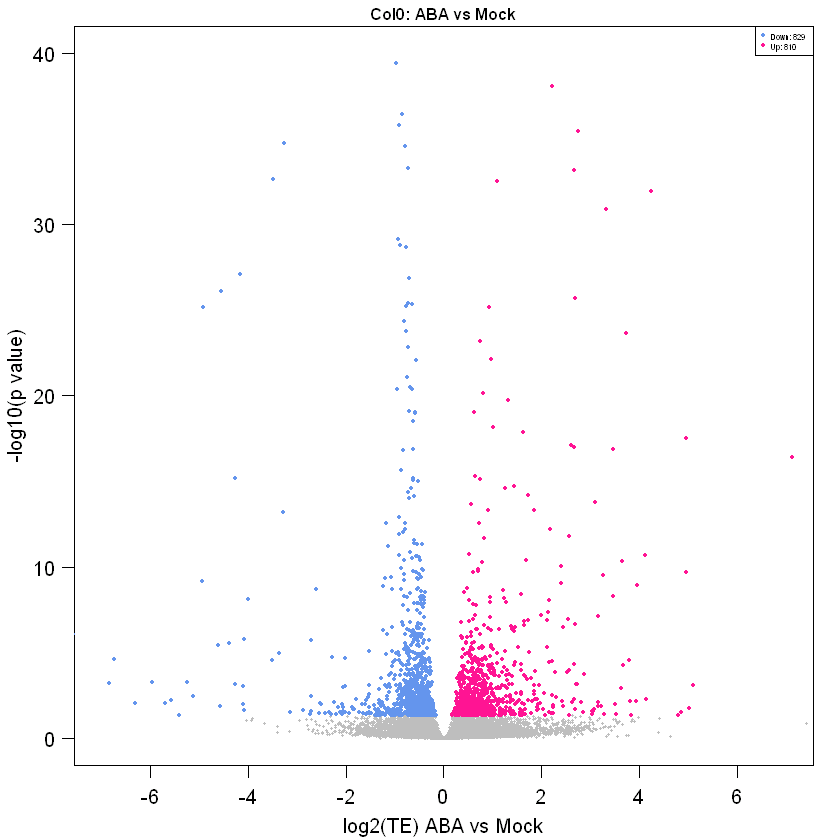

In [ ]:
# read xtail file
Col0_ABAvsMock = read.csv("data/col0.xtail.aba_vs_mock.txt",header=T,sep="\t",row.names=1)

## sig volcano
Col0_ABAvsMock_sig = subset(Col0_ABAvsMock,pvalue.adjust<0.05)
Col0_ABAvsMock_sig_down = subset(Col0_ABAvsMock_sig,log2FC_TE_final<0)
Col0_ABAvsMock_sig_up = subset(Col0_ABAvsMock_sig,log2FC_TE_final>0)

nrow(Col0_ABAvsMock_sig)
nrow(Col0_ABAvsMock_sig_down)
nrow(Col0_ABAvsMock_sig_up)


#pdf("Col0_ABAvsMock_TE_volcano_plot.pdf", width=5.5/2.54, height=5.5/2.54)#,family = "Arial",pointsize = 8)#,paper = "a4")
par(mar= c(3,3,1,1)+0.1,mgp = c(2,0.8,0),las=1,lwd=1)
plot((Col0_ABAvsMock$log2FC_TE_final),-log10(Col0_ABAvsMock$pvalue.adjust), ylab = "-log10(p value)", xlab = "log2(TE) ABA vs Mock", col = "gray",pch = 16,cex =0.3,ylim = c(0,40),xlim = c(-7,7),main = "Col0: ABA vs Mock",cex.main = 0.8)
points((Col0_ABAvsMock_sig$log2FC_TE_final),-log10(Col0_ABAvsMock_sig$pvalue.adjust),col = ifelse(Col0_ABAvsMock_sig$log2FC_TE_final<0,"cornflowerblue","deeppink1"),pch = 16,cex =0.4)
legend("topright", legend = c("Down: 829","Up: 810"),pch = 16,col = c("cornflowerblue","deeppink1"),cex =0.4,bg = "white")
#dev.off()

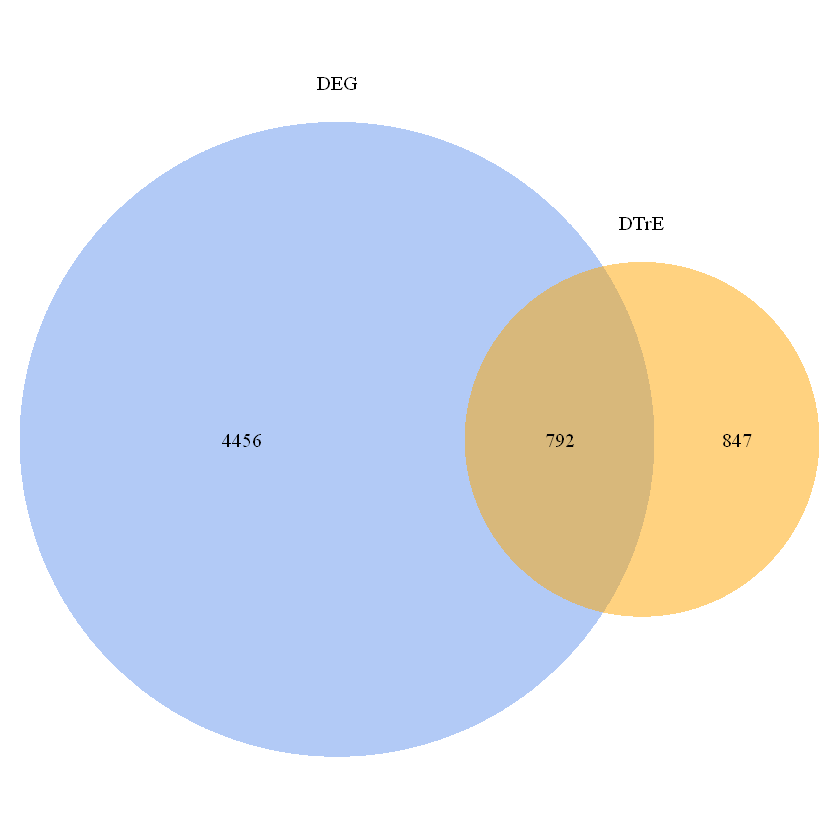

In [14]:
#figure_1c

library(VennDiagram)

rna =read.csv("data/RNA.rawcount.txt.ABA-Col0_vs_Mock-Col0.DESeq2.txt",sep = "\t",header=T)
rna <- subset(rna, padj<0.05)

TE <- read.table("data/col0.xtail.aba_vs_mock.txt",header = T,row.names = 1)
TE <- subset(TE, pvalue.adjust<0.05)

common= intersect(rownames(rna),rownames(TE))

#pdf("ABA_col_vs_col_DEGs_TE_venn.pdf",width = 2.5, height = 2.5)
par(mar= c(0,0,0,0)+0.1,mgp = c(1,0.8,0),las=1,lwd=1)
venn.plot <- draw.pairwise.venn(nrow(rna), nrow(TE), length(common),
category = c("DEG", "DTrE"),
cat.pos = c(0,0),
fill = c("cornflowerblue","orange"),
lty = "blank",
cat.cex = 1,
main = "Col0: ABA vs Mock")

#dev.off()

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


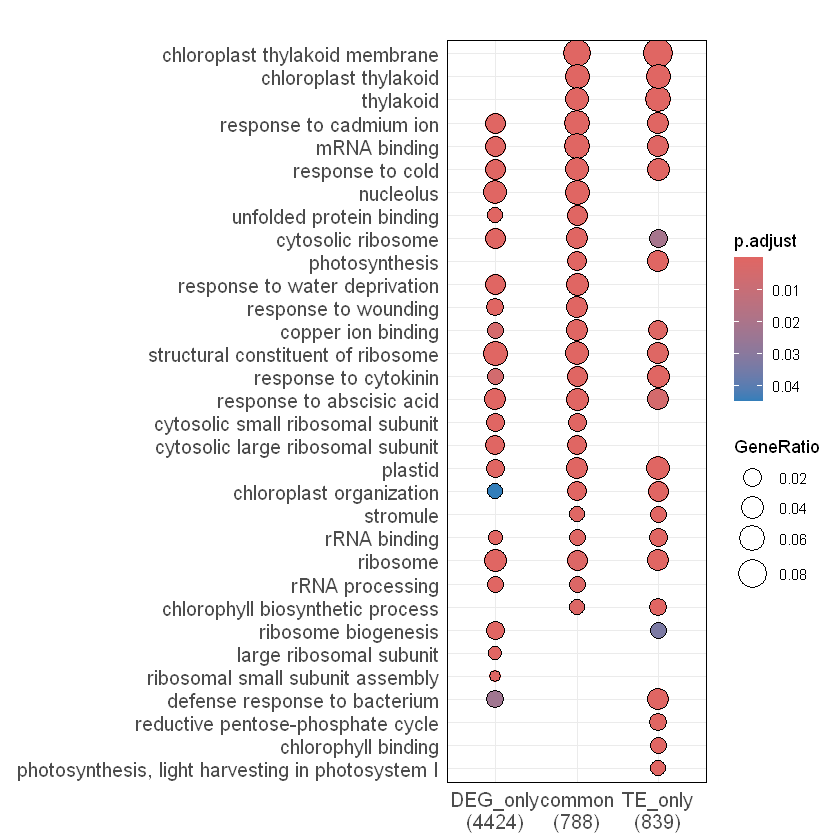

In [44]:
#figure_1d

library(data.table)
library(clusterProfiler)
library(org.At.tair.db)
library(ggplot2)
library(stringr)


DEG_only = setdiff(rownames(rna),rownames(TE))
TE_only = setdiff(rownames(TE),rownames(rna))
mydf <- data.frame(Entrez = c(DEG_only, common, TE_only), group = c(rep("DEG_only", length(DEG_only)),rep("common", length(common)), rep("TE_only", length(TE_only)) ))


t2n <- fread("data/t2n-zj.txt",header = F,sep = "\t")
t2g <- fread("data/t2g-zj.txt",header = F,sep = "\t")

compare_result <- compareCluster(Entrez ~ group, data = mydf, fun = "enricher", TERM2GENE = t2g, TERM2NAME = t2n, pvalueCutoff = 0.05)
compare_result@compareClusterResult$Cluster <- factor(compare_result@compareClusterResult$Cluster, levels = c("DEG_only", "common", "TE_only"))


#pdf("fig1_Col0_ABA_vs_Mock_DEGs_TE_GO.pdf",width = 6.5,height = 7)
dotplot(compare_result, showCategory = 15) +
  theme_minimal() +
  theme(panel.border = element_rect(color = "black", fill = NA, linewidth = 0.3), axis.text.y = element_text(size = 12), axis.text.x = element_text(size = 12)) +
  xlab(NULL)+
  scale_y_discrete(labels=function(y) str_wrap(y, width=100))
#dev.off()